<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_17_Matplotlib Histograms.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/haticekar/Desktop/anaconda/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


## 🟩 Data Scientist Hourly Salaries (2.17.1)

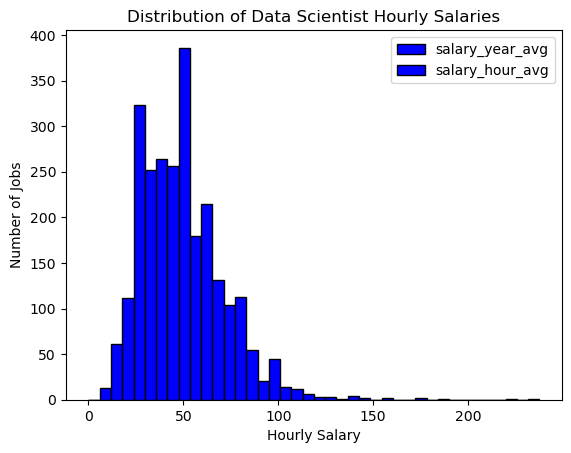

In [9]:
df_DS = df[df["job_title_short"] == "Data Scientist"].copy()
df_DS = df_DS.dropna(subset=["salary_hour_avg"])
df_DS.plot(
    kind="hist",
    bins=40,
    color="blue",
    edgecolor="black"

)
plt.xlabel("Hourly Salary")
plt.ylabel("Number of Jobs")
plt.title('Distribution of Data Scientist Hourly Salaries')
plt.show()

---

## 🟨 Job Postings by Number of Skills (2.17.2)

 1. .apply(len) ne yapar?

* apply(len) → her satıra len() uygular.
* Yani her iş ilanındaki job_skills listesinin kaç beceriden oluştuğunu hesaplar.


| job_skills                              | num_skills |
|----------------------------------------|------------|
| ['Python', 'SQL']                      | 2          |
| ['Excel', 'Power BI', 'Tableau']       | 3          |
| ['Python']                             | 1          |


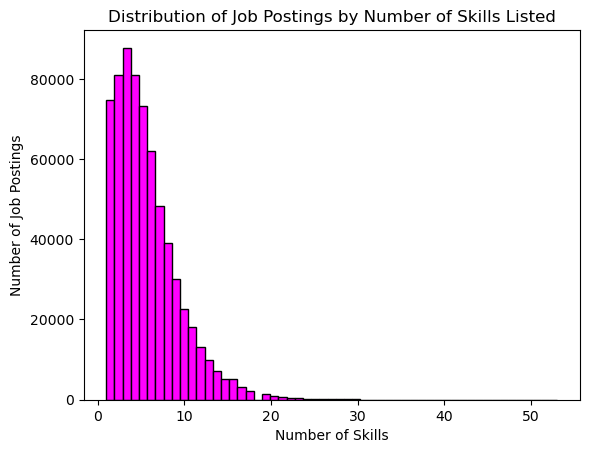

In [ ]:
df_skills = df.dropna(subset=["job_skills"]).copy()
df_skills["num_skills"] = df_skills["job_skills"].apply(len) # apply(len) her iş ilanının kaç tane beceri (skill) belirttiğini sayar.
df_skills["num_skills"].plot(
    kind="hist",
    bins=55,
    color="magenta",
    edgecolor="black"
)
plt.title("Distribution of Job Postings by Number of Skills Listed")
plt.xlabel("Number of Skills")
plt.ylabel("Number of Job Postings")
plt.show()

---

## 🟥 Data Engineer Salaries (2.17.3)

1. ✅ plt.axvline() Nedir?

* axvline → "axis vertical line" kelimesinin kısaltmasıdır.
*  Bu fonksiyon, grafiğe dikey bir çizgi (vertical line) çizer.

2. plt.axvline(mean_salary, color="blue", linestyle="dashed", label= f'Mean: ${mean_salary:,.0f}') - plt.axvline(median_salary, color="green", linestyle="dashed", label= f'Median: ${median_salary:,.0f}')
* Bu çizgiler sayesinde:

* Histogramdaki maaş dağılımının ortalama ve medyan değerlerinin nerede konumlandığını görürüz
* Dağılımın dengeli mi, kayık mı olduğunu anlarız (örneğin: sağa kayıksa ortalama > medyan olur)

| Kod Parçası                      | Açıklama                                             |
|----------------------------------|------------------------------------------------------|
| df["job_title_short"] == ...     | Sadece "Data Engineer" ilanlarını alır               |
| dropna(subset=["salary_year_avg"]) | Boş maaş değerlerini temizler                     |
| .mean(), .median()               | Ortalama ve medyan maaşları hesaplar                 |
| plot(kind="hist")                | Histogram çizer (50 aralıklı, kırmızı çubuklu)       |
| plt.axvline()                    | Ortalama ve medyan için dikey çizgiler ekler         |
| plt.legend(), plt.show()         | Etiketleri ve grafiği gösterir                       |



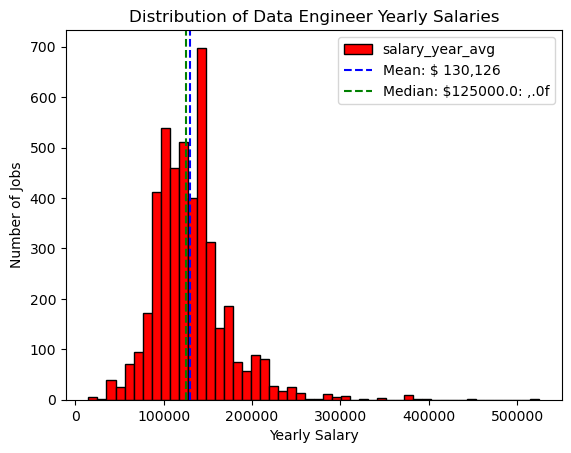

In [23]:
df_DE = df[df["job_title_short"] == "Data Engineer"].copy()
df_DE = df_DE.dropna(subset=["salary_year_avg"])
mean_salary = df_DE["salary_year_avg"].mean()
median_salary = df_DE["salary_year_avg"].median()

df_DE["salary_year_avg"].plot(
    kind="hist",
    bins=50,
    color="red",
    edgecolor="black"
)
plt.axvline(
    mean_salary,
    color="blue",
    linestyle="dashed",
    label= f'Mean: ${mean_salary: ,.0f}'
)
plt.axvline(
    median_salary,
    color="green",
    linestyle="dashed",
    label = f'Median: ${median_salary}: ,.0f'
)
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()

---